# Calculate distance tutorial

Tutorial presents use cases of euclidean distance function. It is designed to explain theory, algorithm and data structures related to this method.

Scope of the notebook:
* One dimensional array / <span style="color:pink">Practice</span>
* Two dimensional matrix / <span style="color:pink">Practice</span>
* Three dimensional matrices / <span style="color:pink">Practice</span>
* Points in n-dimensional space / <span style="color:pink">Practice</span>
* Data limits / <span style="color:pink">Practice</span>
* Mathematical assumptions / <span style="color:green">Theory</span>
* Algorithm and nupy functions behind it / <span style="color:green">Theory</span>

In [5]:
# Import libraries for the data preparation (numpy) and visualizations (matplotlib). Import reviewed function.

%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from helper_functions.euclidean_distance import calculate_distance as distance

### One dimensional array: distances between all points

One dimensional arrays are usually signals coming from different sources and their position usually represents time, e.g.: temperature readings day by day, voltage measurements in circuit, traffic in the website or number of customers in the shop by hour by year. In some cases a dimension represents spatial units: the force streatching steel line in each point. To make this tutorial more readable we will use "real world" signals.

### Signal description

Signal used in this tutorial comes from the standard: Cardiac monitors, heart rate meters, and alarms [American National Standard (ANSI/AAMI EC13:2002)]. Arlington, VA: Association for the Advancement of Medical Instrumentation, 2002. Data is retrieved from PhysioNet database: Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals. Circulation 101(23):e215-e220 [Circulation Electronic Pages; http://circ.ahajournals.org/content/101/23/e215.full]; 2000 (June 13).

Signal represents 

In [70]:
# Signal

signal = np.fromfile(os.getcwd() + '/tutorials/datasets/aami3a.dat', dtype=float)[:720]
time_array = np.arange(start=0, stop=1, step=1/len(signal))

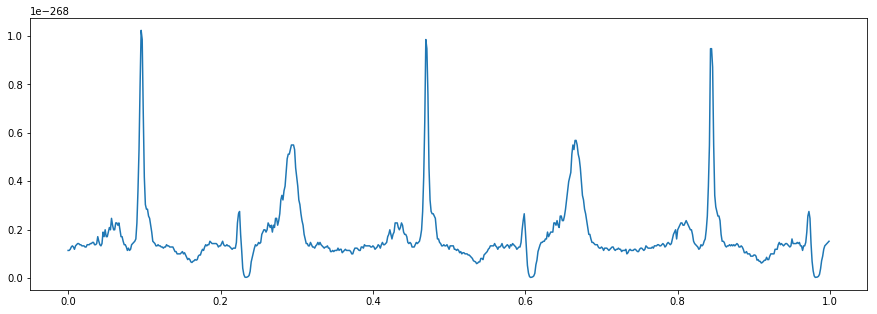

In [71]:
plt.figure(figsize=(15,5))
plt.plot(time_array, signal)

In [72]:
# Calculate distance: column with "distances" should be passed into this function

d = distance(time_array)

Distance represents one dimensional array. It is easy to test if our function works well - the first row of output matrix should be the same as our points array minus the first value of points array. Why? Because each row of output array represents distances from each point to the other points where each column represents position of specific point. 

In [73]:
time_array[:10]  ## input distance

array([ 0.        ,  0.00138889,  0.00277778,  0.00416667,  0.00555556,
        0.00694444,  0.00833333,  0.00972222,  0.01111111,  0.0125    ])

In [74]:
d[0][:10]  ## output distances

array([ 0.        ,  0.00138889,  0.00277778,  0.00416667,  0.00555556,
        0.00694444,  0.00833333,  0.00972222,  0.01111111,  0.0125    ])

In [75]:
(time_array - time_array[0])[:10]  ## input distance minus the first measurement

array([ 0.        ,  0.00138889,  0.00277778,  0.00416667,  0.00555556,
        0.00694444,  0.00833333,  0.00972222,  0.01111111,  0.0125    ])

## Two dimensional array: distances between points located on the Earth's surface

If you want to measure acidity (pH) of soil in a corn field you take few dozens of samples from different locations inside your study area and interpolate missing measurements from them. Each point has specific address: latitude and longitude or x and y on the cartesian plane. If you want to perform interpolation of a soil acidity in positions where you didn't take samples then you should know distances between your points. You may even assume that the value in unknown location is the sum other values divided by distance to them.

It works like the superposition rule in physics but example of this rule will be presented in different tutorial. I'll show here how does function work with the two-dimensional data.

In [36]:
# Point locations

number_of_points = 5
loc_x = np.random.randint(0, high=20, size=(number_of_points,))
loc_y = np.random.randint(0, high=20, size=(number_of_points,))
vals = np.random.random_sample(size=(number_of_points,))

field_measurements = np.array([loc_x, loc_y, vals])
field_measurements = field_measurements.T

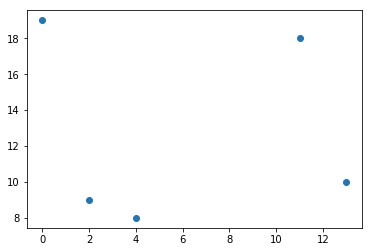

In [28]:
plt.scatter(field_measurements[:, 0], field_measurements[:, 1])

In [32]:
d = distance(field_measurements[:, :-1])

In [33]:
d

array([[  0.        ,   2.23606798,  11.04536102,  12.72792206,
         10.19803903],
       [  2.23606798,   0.        ,   9.21954446,  12.20655562,
         11.70469991],
       [ 11.04536102,   9.21954446,   0.        ,   8.24621125,  15.8113883 ],
       [ 12.72792206,  12.20655562,   8.24621125,   0.        ,
         11.04536102],
       [ 10.19803903,  11.70469991,  15.8113883 ,  11.04536102,   0.        ]])

In [35]:
field_measurements[:, :-1]

array([[  2.,   9.],
       [  4.,   8.],
       [ 13.,  10.],
       [ 11.,  18.],
       [  0.,  19.]])